In [137]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
pip install pandas statsmodels

In [50]:
pip install pandas

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

In [138]:
# Read data from a CSV file (replace with the correct file path)
df = pd.read_csv(r'C:\Users\chikw\Downloads\social_media_data.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

                                       Post Content  Post Frequency  \
0  Exciting news! Our new product is now available!               3   
1                    Check out this amazing recipe!               1   
2        Happy Friday! Join us for a special event.               2   
3              New blog post: "10 Tips for Success"               1   
4               Exclusive offer! Limited time only.               1   

  Time of Day               Hashtags  User Engagement History Post Format  \
0     Morning  #newproduct #exciting                     2000       Image   
1     Evening          #recipe #food                     1500        Text   
2   Afternoon      #fridayevent #fun                     3000       Image   
3     Morning     #blogging #success                      500        Text   
4     Evening       #exclusive #sale                     2500       Image   

    Audience Demographics  Likes  Comments  Shares  
0        Young adults, US    250        50     100  
1  F

In [139]:
# Display a concise summary of the DataFrame
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Post Content             96 non-null     object
 1   Post Frequency           96 non-null     int64 
 2   Time of Day              96 non-null     object
 3   Hashtags                 96 non-null     object
 4   User Engagement History  96 non-null     int64 
 5   Post Format              96 non-null     object
 6   Audience Demographics    96 non-null     object
 7   Likes                    96 non-null     int64 
 8   Comments                 96 non-null     int64 
 9   Shares                   96 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 7.6+ KB


In [140]:
# View the last 5 rows also to understand the dataset

df.tail()

,Post Content,Post Frequency,Time of Day,Hashtags,User Engagement History,Post Format,Audience Demographics,Likes,Comments,Shares
91,Exciting giveaway alert! Win a luxury vacation...,1,Morning,#giveaway #vacation,4100,Image,"Social media users, US",450,110,120
92,Throwback to our amazing adventure in the Amaz...,1,Afternoon,#throwback #adventure,1200,Image,"Travel enthusiasts, Worldwide",100,30,35
93,New blog post: 10 Tips for Successful Blogging,1,Morning,#blogging #tips,700,Text,"Bloggers, Worldwide",80,18,15
94,Exclusive discount code! Get 20% off on all or...,2,Evening,#discount #shopping,2600,Image,"Online shoppers, Worldwide",320,70,75
95,Introducing our new mobile app for easy travel...,1,Afternoon,#travelapp #planning,1800,Image,"Frequent travelers, US",200,45,50


In [141]:
# If you want to see 20 rows you add 20 into the bracket

df.head(100)

,Post Content,Post Frequency,Time of Day,Hashtags,User Engagement History,Post Format,Audience Demographics,Likes,Comments,Shares
0,Exciting news! Our new product is now available!,3,Morning,#newproduct #exciting,2000,Image,"Young adults, US",250,50,100
1,Check out this amazing recipe!,1,Evening,#recipe #food,1500,Text,"Food lovers, Worldwide",100,30,20
2,Happy Friday! Join us for a special event.,2,Afternoon,#fridayevent #fun,3000,Image,"All ages, UK",500,100,150
3,"New blog post: ""10 Tips for Success""",1,Morning,#blogging #success,500,Text,"Professionals, US",50,10,5
4,Exclusive offer! Limited time only.,1,Evening,#exclusive #sale,2500,Image,"Shoppers, Worldwide",300,70,50
...,...,...,...,...,...,...,...,...,...,...
91,Exciting giveaway alert! Win a luxury vacation...,1,Morning,#giveaway #vacation,4100,Image,"Social media users, US",450,110,120
92,Throwback to our amazing adventure in the Amaz...,1,Afternoon,#throwback #adventure,1200,Image,"Travel enthusiasts, Worldwide",100,30,35
93,New blog post: 10 Tips for Successful Blogging,1,Morning,#blogging #tips,700,Text,"Bloggers, Worldwide",80,18,15
94,Exclusive discount code! Get 20% off on all or...,2,Evening,#discount #shopping,2600,Image,"Online shoppers, Worldwide",320,70,75


In [142]:
# To see all the columns in the dataset 

df.columns

Index(['Post Content', 'Post Frequency', 'Time of Day', 'Hashtags',
       'User Engagement History', 'Post Format', 'Audience Demographics',
       'Likes', 'Comments', 'Shares'],
      dtype='object')

In [143]:
# to view some statistic information about the numeric data in the dataset

df.describe()

,Post Frequency,User Engagement History,Likes,Comments,Shares
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.395833,2095.312500,222.031250,50.229167,55.333333
std,0.589007,970.324908,124.572064,28.385126,36.832385
min,1.000000,500.000000,45.000000,10.000000,5.000000
25%,1.000000,1200.000000,90.000000,25.000000,19.500000
50%,1.000000,2050.000000,220.000000,45.000000,50.000000
75%,2.000000,2800.000000,320.000000,75.000000,81.250000
max,3.000000,4500.000000,500.000000,110.000000,150.000000


In [144]:
# check the data type of all the columns

df.dtypes

Post Content               object
Post Frequency              int64
Time of Day                object
Hashtags                   object
User Engagement History     int64
Post Format                object
Audience Demographics      object
Likes                       int64
Comments                    int64
Shares                      int64
dtype: object

In [145]:
#We can also check to see if there are still missing values

df.isna().sum().sum()

0

In [146]:
# List all column names to identify the target variable
social_media_data.columns

Index(['Post Content', 'Post Frequency', 'Time of Day', 'Hashtags',
       'User Engagement History', 'Post Format', 'Audience Demographics',
       'Likes', 'Comments', 'Shares'],
      dtype='object')

In [66]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\chikw\Downloads\social_media_data.csv'  # Use raw string

# Load the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the data to confirm it's loaded correctly
print(data.head())


                                       Post Content  Post Frequency  \
0  Exciting news! Our new product is now available!               3   
1                    Check out this amazing recipe!               1   
2        Happy Friday! Join us for a special event.               2   
3              New blog post: "10 Tips for Success"               1   
4               Exclusive offer! Limited time only.               1   

  Time of Day               Hashtags  User Engagement History Post Format  \
0     Morning  #newproduct #exciting                     2000       Image   
1     Evening          #recipe #food                     1500        Text   
2   Afternoon      #fridayevent #fun                     3000       Image   
3     Morning     #blogging #success                      500        Text   
4     Evening       #exclusive #sale                     2500       Image   

    Audience Demographics  Likes  Comments  Shares  
0        Young adults, US    250        50     100  
1  F

Intercept: -9.828407897195035
Coefficient: 0.11124301803345032


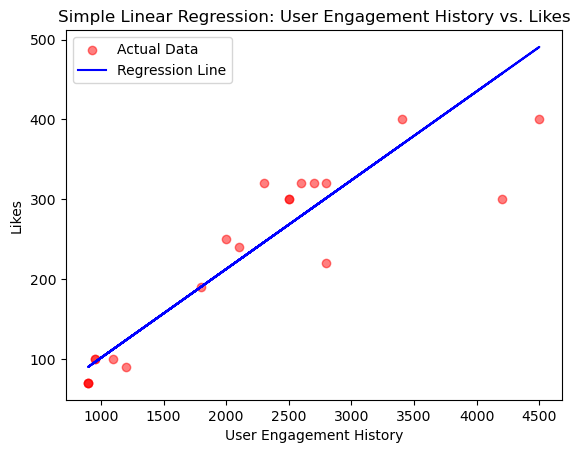

In [148]:

# Define the feature and the target variable
X = social_media_data[['User Engagement History']]
y = social_media_data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = linear_model.predict(X_test)

# Calculate and display the coefficients
intercept = linear_model.intercept_
coefficient = linear_model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

# Plot the scatter plot of the test data
plt.scatter(X_test, y_test, color='r', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='b', label='Regression Line')

# Add title and labels
plt.title("Simple Linear Regression: User Engagement History vs. Likes")
plt.xlabel("User Engagement History")
plt.ylabel("Likes")

# Add a legend
plt.legend()

# Display the plot
plt.show()

Intercept: -3.8293330004870256
Coefficients: [-4.51627211e-03  3.57701237e+00  6.95280872e-01  1.41687247e+01]


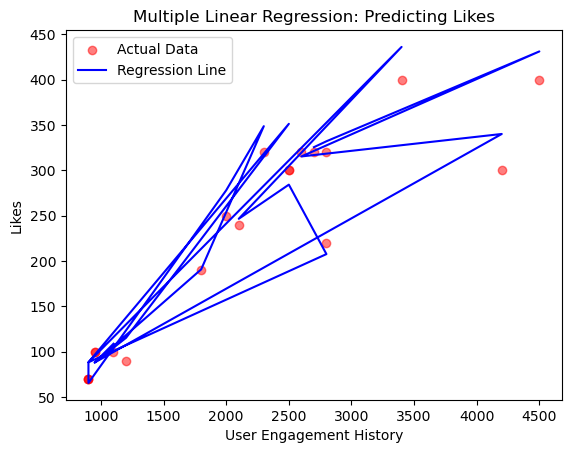

In [149]:
# Define the features and the target variable
X = social_media_data[['User Engagement History', 'Comments', 'Shares', 'Post Frequency']]
y = social_media_data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = linear_model.predict(X_test)

# Calculate and display the coefficients
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Plot the scatter plot of the test data for the first variable 'User Engagement History'
plt.scatter(X_test['User Engagement History'], y_test, color='r', alpha=0.5, label='Actual Data')

# Plot the regression line for the first variable 'User Engagement History'
plt.plot(X_test['User Engagement History'], y_pred, color='b', label='Regression Line')

# Add title and labels
plt.title("Multiple Linear Regression: Predicting Likes")
plt.xlabel("User Engagement History")
plt.ylabel("Likes")

# Add a legend
plt.legend()

# Display the plot
plt.show()


Intercept: -3.8293330004870256
Coefficients: [-4.51627211e-03  3.57701237e+00  6.95280872e-01  1.41687247e+01]


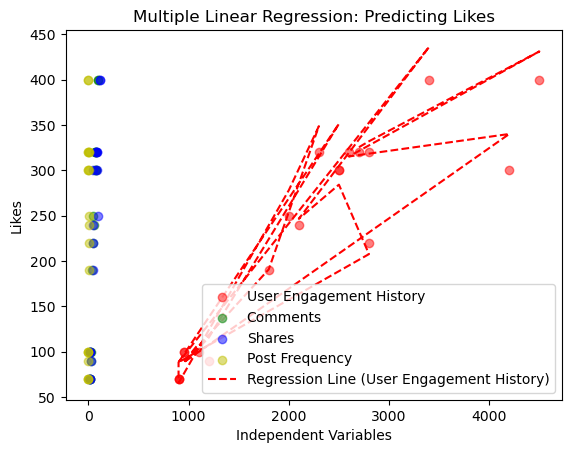

In [150]:
# Define the features and the target variable
X = social_media_data[['User Engagement History', 'Comments', 'Shares', 'Post Frequency']]
y = social_media_data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = linear_model.predict(X_test)

# Calculate and display the coefficients
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Plot the scatter plot of the test data for the different variables
plt.scatter(X_test['User Engagement History'], y_test, color='r', alpha=0.5, label='User Engagement History')
plt.scatter(X_test['Comments'], y_test, color='g', alpha=0.5, label='Comments')
plt.scatter(X_test['Shares'], y_test, color='b', alpha=0.5, label='Shares')
plt.scatter(X_test['Post Frequency'], y_test, color='y', alpha=0.5, label='Post Frequency')

# Plot the regression line for the first variable 'User Engagement History'
plt.plot(X_test['User Engagement History'], y_pred, color='r', linestyle='--', label='Regression Line (User Engagement History)')

# Add title and labels
plt.title("Multiple Linear Regression: Predicting Likes")
plt.xlabel("Independent Variables")
plt.ylabel("Likes")

# Add a legend
plt.legend()

# Display the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

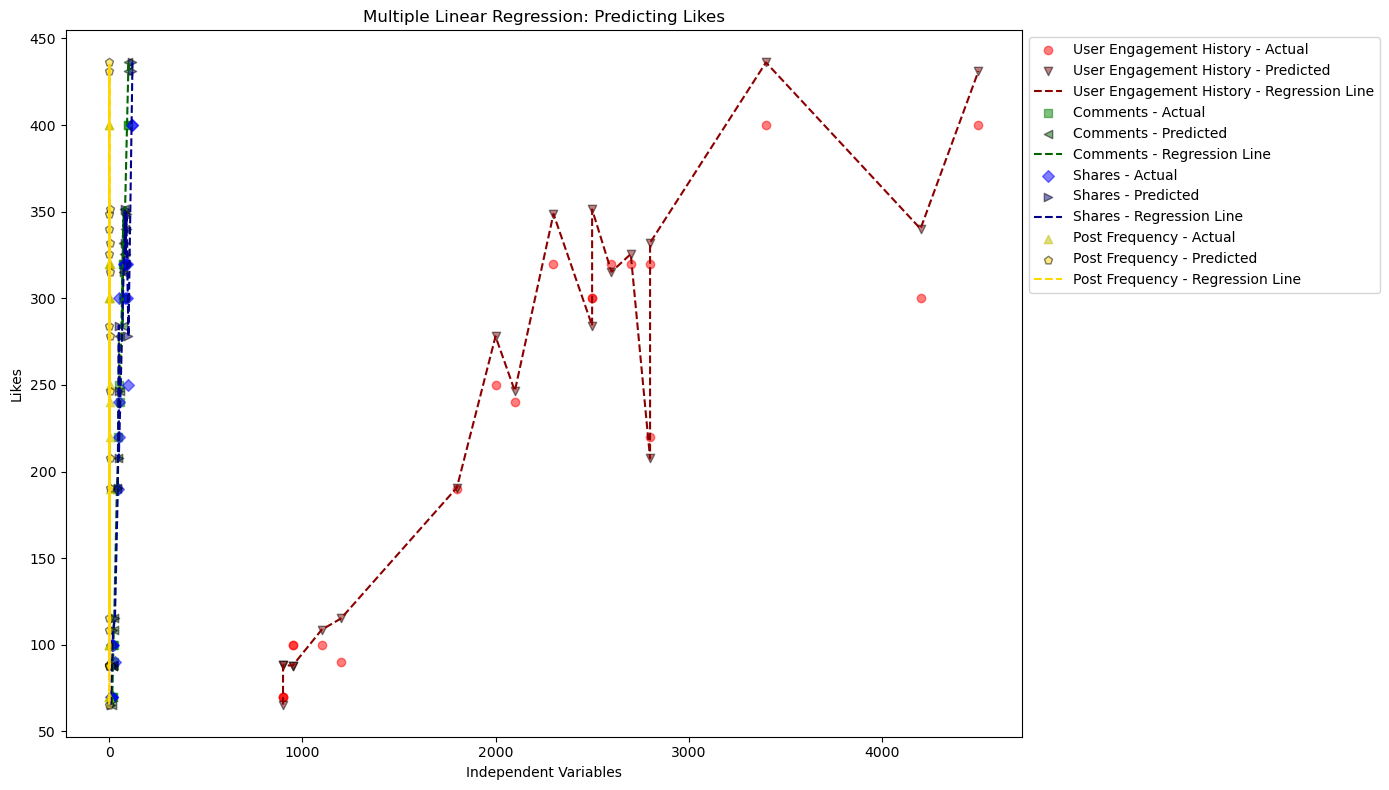

In [151]:

# Plot the scatter plot of the test data for the different variables
plt.figure(figsize=(14, 8))

colors_actual = ['r', 'g', 'b', 'y']
colors_predicted = ['darkred', 'darkgreen', 'darkblue', 'gold']
shapes_actual = ['o', 's', 'D', '^']
shapes_predicted = ['v', '<', '>', 'p']
variables = ['User Engagement History', 'Comments', 'Shares', 'Post Frequency']

for i, variable in enumerate(variables):
    plt.scatter(X_test[variable], y_test, color=colors_actual[i], alpha=0.5, label=f'{variable} - Actual', marker=shapes_actual[i])
    plt.scatter(X_test[variable], y_pred, color=colors_predicted[i], alpha=0.5, edgecolor='k', label=f'{variable} - Predicted', marker=shapes_predicted[i])
    sorted_indices = X_test[variable].argsort()
    plt.plot(X_test[variable].iloc[sorted_indices], y_pred[sorted_indices], color=colors_predicted[i], linestyle='--', label=f'{variable} - Regression Line')

# Add title and labels
plt.title("Multiple Linear Regression: Predicting Likes")
plt.xlabel("Independent Variables")
plt.ylabel("Likes")

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Display the plot
plt.tight_layout()
plt.show